In [1]:
library(igraph)
library(ggplot2)
library(RColorBrewer)
library(rgl)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).



+ 100/100 vertices, from 5c0e546:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

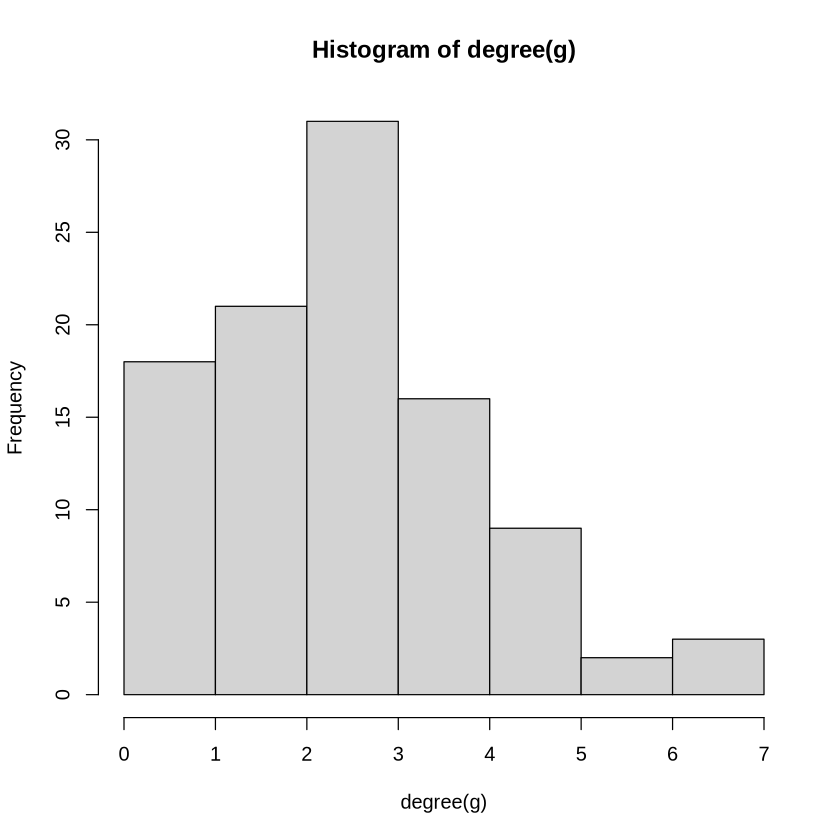

In [16]:
source("/home/pietromalagoli/PCN/common.R")

set.seed(12345)

N <- 200

g <- erdos.renyi.game(N, p = 2*log(N)/N, directed = FALSE)
#V(g) 

failure <- function(g, n) {
    # attributes:
    # g : graph
    # n: number st of random nodes to remove
    nodes <- V(g)

    list <- sample(min(nodes):max(nodes), n, replace = TRUE )
    #print(list)
    nodes <- nodes[list]
    print(nodes)
    return(delete_vertices(g, nodes))
}


attack <- function(g, n) {
    # attributes:
    # g : graph
    # list: list of random nodes to remove
    nodes <- V(g)

    # Calculate the degree of all the nodes
    degrees <- degree(g)
    #print(degrees)

    # Order the nodes for decreasing degree
    ordered_index <- order(degrees, decreasing = TRUE)
    nodes <- nodes[ordered_index]
    nodes <- nodes[1:n]
    return(delete_vertices(g, nodes))
}

#V(failure(g, 10))
#g <- attack(g, 10)
#V(g)
#V(g)
g <- attack(g, 100)
V(g)
hist(degree(g))